<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Feb 26 14:26:10 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.104      Driver Version: 528.79       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA T1200 La...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   61C    P0    17W /  80W |   1861MiB /  4096MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

2.2.0+cu118
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
#Autopilot, a self-driving car model
#Medizin
#Facerecognition

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [4]:
#Wenn das Modell sich zu sehr auf die Trainingsdaten eingestellt hat und nicht mehr generalisieren kann

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
#Mehr Trainingsdaten, verwendung von Validierungsdaten, Regularisierung

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

print (len(train_data))
print (len(test_data))

train_data[0]

60000
10000


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 6. Visualize at least 5 different samples of the MNIST training dataset.

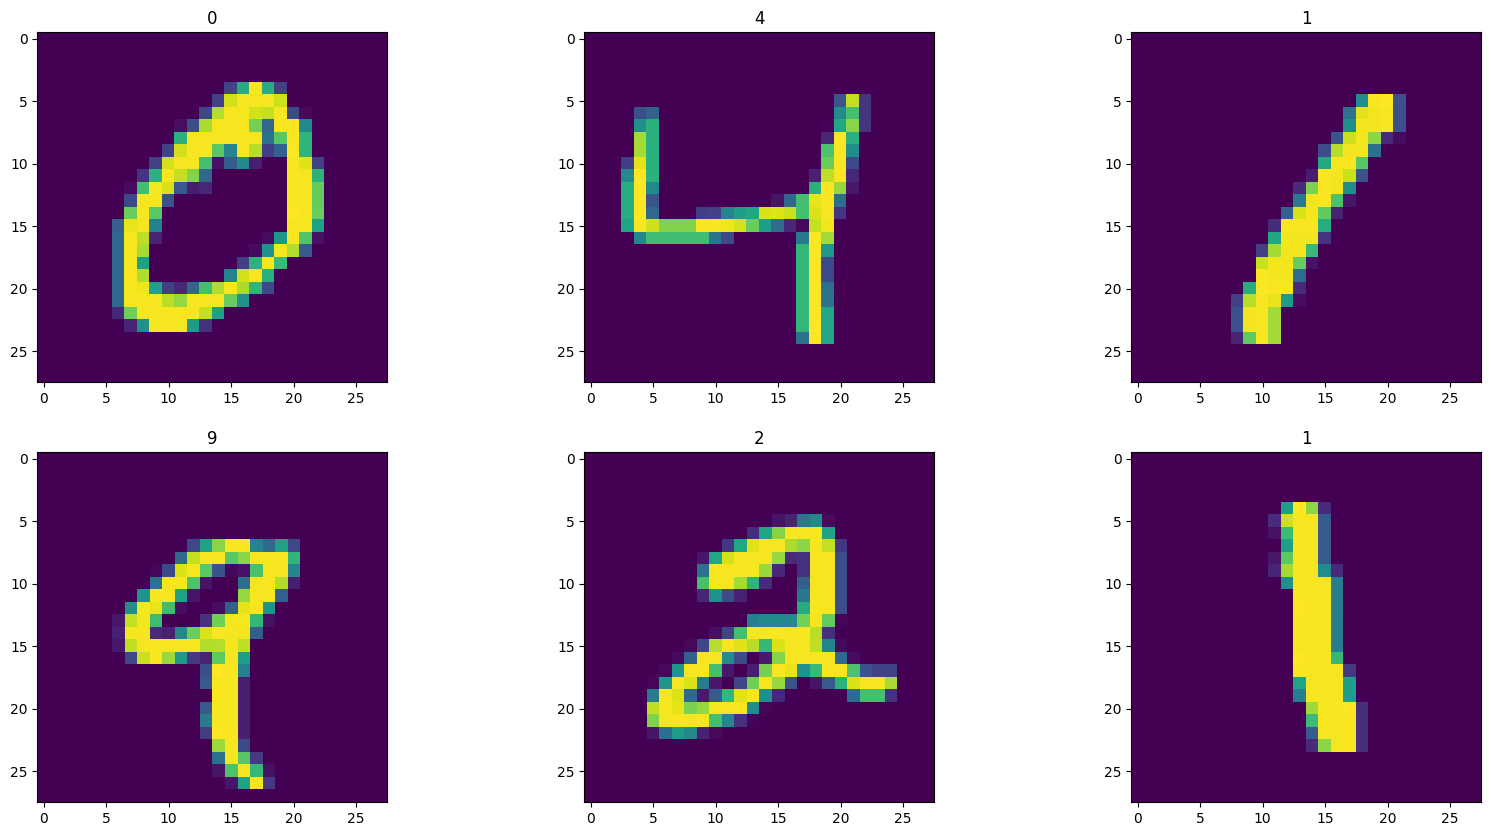

In [7]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10))
for i in range(1, 6+1):
    img = train_data[i][0].squeeze()
    fig.add_subplot(2, 3, i)
    plt.imshow(img)
    plt.title(train_data[i][1])


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

print (len(train_loader))
print (len(test_loader))

train_batch_features, train_batch_labels  = next(iter(train_loader))
test_batch_features, test__batch_labels = next(iter(test_loader))

train_batch_features.shape


1875
313


torch.Size([32, 1, 28, 28])

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
import torch.nn as nn
# Create a convolutional neural network 
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        #print(x.shape)
        x = self.block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x


torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=10).to(device)
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
image=train_batch_features[0]
image=image.unsqueeze(0)
image=image.to(device)
image.shape

torch.Size([1, 1, 28, 28])

In [11]:
model_2(image)

/home/daniel/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


tensor([[ 0.0409, -0.0737,  0.0525, -0.0305,  0.0029,  0.0144,  0.0011, -0.0129,
          0.0224,  0.0021]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [12]:
# # Go from logits -> pred labels
model_2(image).argmax(dim=1)

tensor([2], device='cuda:0')

In [13]:
%%time
device = "cuda" if torch.cuda.is_available() else "cpu"
model_gpu = MNISTModelV2(input_shape=1, hidden_units=10, output_shape=10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 10
for epoch in range(epochs):
    train_loss = 0
    model_gpu.train()
    for batch, (X,y) in enumerate(train_loader):
        #print(f"Epoch {epoch} Batch {batch} X.shape: {X.shape} y.shape: {y.shape}")
        X, y = X.to(device), y.to(device)
        
        y_pred = model_gpu(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    train_loss /= len(train_loader)
    
    #Testing loop
    
    test_loss_total = 0
    model_gpu.eval()
    with torch.inference_mode():
        for batch, (X_test,y_test) in enumerate(test_loader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model_gpu(X_test)
            
            test_loss = loss_fn(test_pred, y_test)
            test_loss_total += test_loss
        test_loss_total /= len(test_loader)
        
    print(f"Epoch {epoch}, Training loss: {train_loss}, Test loss: {test_loss_total}")
    

Epoch 0, Training loss: 0.32065662541861334, Test loss: 0.074050173163414
Epoch 1, Training loss: 0.074654464159611, Test loss: 0.06254954636096954
Epoch 2, Training loss: 0.0607601115509402, Test loss: 0.053401824086904526
Epoch 3, Training loss: 0.052473656801056735, Test loss: 0.0629005879163742
Epoch 4, Training loss: 0.047318225585626594, Test loss: 0.04465604946017265
Epoch 5, Training loss: 0.04310450177591604, Test loss: 0.040413036942481995
Epoch 6, Training loss: 0.04019476899744865, Test loss: 0.03800595551729202
Epoch 7, Training loss: 0.036617022432328665, Test loss: 0.038913458585739136
Epoch 8, Training loss: 0.034472940675537876, Test loss: 0.03649195283651352
Epoch 9, Training loss: 0.03226512155965126, Test loss: 0.037520650774240494
CPU times: user 1min 13s, sys: 5.77 s, total: 1min 19s
Wall time: 1min 18s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [14]:
test_features = torch.stack([data for data, _ in test_data]).to(device)
predictions=model_gpu(test_features).softmax(dim=1).argmax(dim=1)

predictions[1]



tensor(2, device='cuda:0')

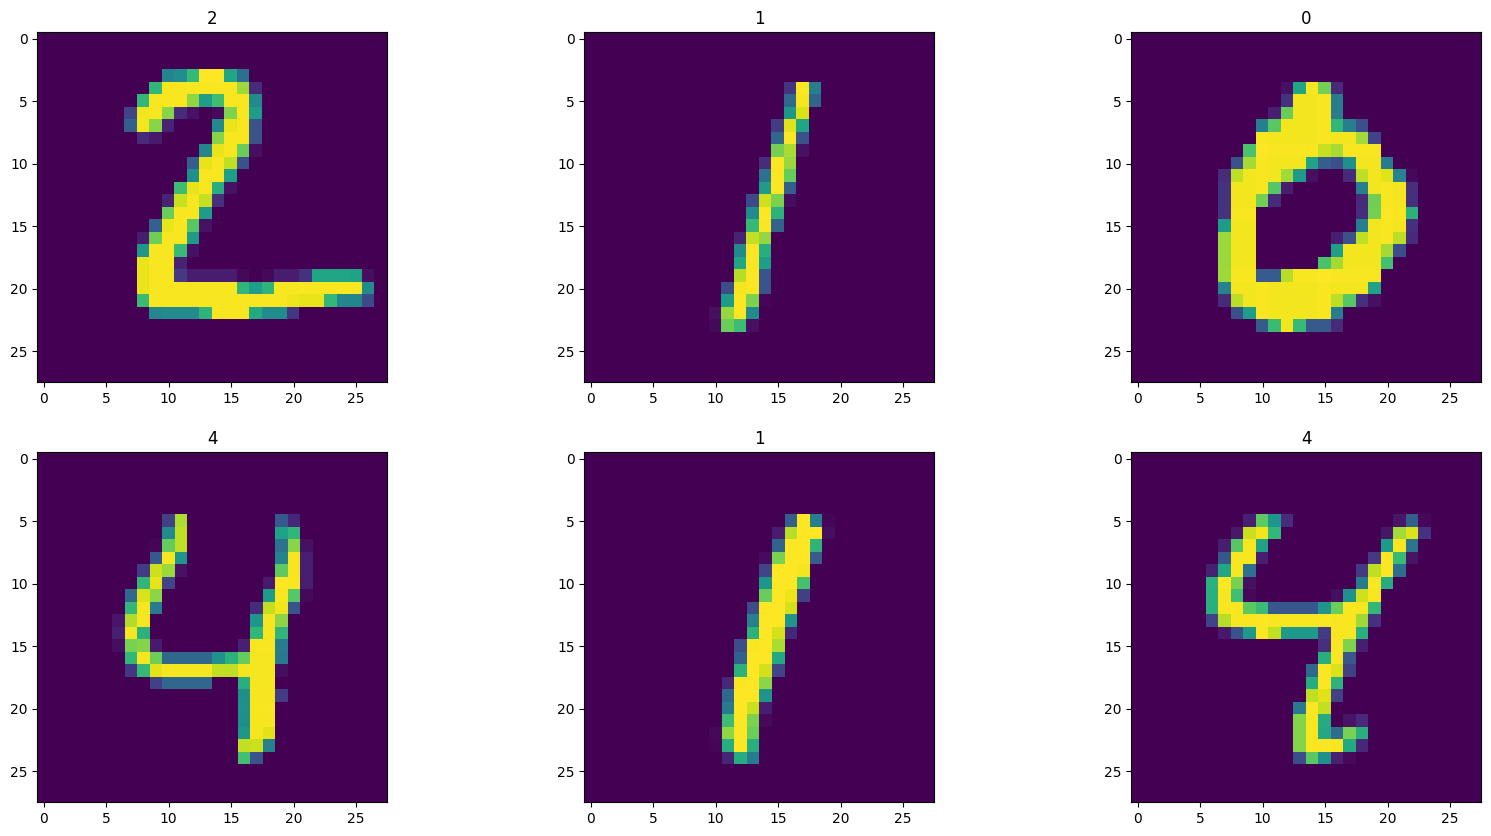

In [15]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10))
for i in range(1, 6+1):
    img = test_data[i][0].squeeze()
    fig.add_subplot(2, 3, i)
    plt.imshow(img)
    plt.title(predictions[i].item())

In [16]:
for i in range(0, len(predictions)):
    if predictions[i].item() != test_data[i][1]:
        print("UnCorrect " + str(i))

UnCorrect 211
UnCorrect 247
UnCorrect 259
UnCorrect 445
UnCorrect 543
UnCorrect 582
UnCorrect 619
UnCorrect 625
UnCorrect 674
UnCorrect 684
UnCorrect 720
UnCorrect 740
UnCorrect 829
UnCorrect 938
UnCorrect 947
UnCorrect 965
UnCorrect 1014
UnCorrect 1039
UnCorrect 1114
UnCorrect 1182
UnCorrect 1226
UnCorrect 1232
UnCorrect 1242
UnCorrect 1247
UnCorrect 1299
UnCorrect 1319
UnCorrect 1393
UnCorrect 1530
UnCorrect 1549
UnCorrect 1717
UnCorrect 1878
UnCorrect 2018
UnCorrect 2035
UnCorrect 2043
UnCorrect 2070
UnCorrect 2109
UnCorrect 2118
UnCorrect 2130
UnCorrect 2135
UnCorrect 2266
UnCorrect 2272
UnCorrect 2293
UnCorrect 2308
UnCorrect 2369
UnCorrect 2387
UnCorrect 2454
UnCorrect 2462
UnCorrect 2597
UnCorrect 2654
UnCorrect 2742
UnCorrect 2896
UnCorrect 2921
UnCorrect 2939
UnCorrect 2953
UnCorrect 3030
UnCorrect 3060
UnCorrect 3073
UnCorrect 3289
UnCorrect 3422
UnCorrect 3520
UnCorrect 3727
UnCorrect 3806
UnCorrect 3808
UnCorrect 3853
UnCorrect 3941
UnCorrect 4007
UnCorrect 4075
UnCorrect 4

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


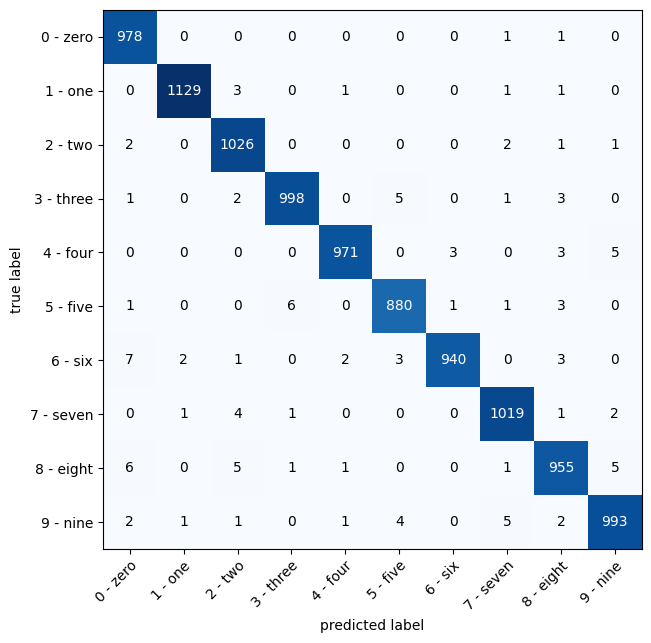

In [17]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
confmat_tensor = confmat(preds=predictions.to("cpu"),
                         target=test_data.targets.to("cpu"))

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=train_data.classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?